# Проект: Обучение с учителем: качество модели

## Цель проекта: 
- Разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

## План проекта
- Разработать модель, которая предскажет вероятность снижения покупательской активности.
- Выделить сегмент покупателей, проанализировать его и предложить, как увеличить его покупательскую активность.  
---
 - Шаг 1. Загрузка данных
 - Шаг 2. Предобработка данных
 - Шаг 3. Исследовательский анализ данных
 - Шаг 4. Объединение таблиц
 - Шаг 5. Корреляционный анализ
 - Шаг 6. Использование пайплайнов
 - Шаг 7. Анализ важности признаков
 - Шаг 8. Сегментация покупателей
 - Шаг 9. Общий вывод

## Описание данных

- **market_file.csv** (Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.)
    - id — номер покупателя в корпоративной базе данных.
    - Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
    - Тип сервиса — уровень сервиса, например «премиум» и «стандарт». Зависит от наличия определенной подписки у пользователя.
    - Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
    - Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
    - Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.
    - Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
    - Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
    - Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.
    - Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
    - Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.
    - Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта за последние 3 месяца.
    - Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.
---
- **market_money.csv** (Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.)
    - id — номер покупателя в корпоративной базе данных.
    - Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
    - Выручка — сумма выручки за период в условных единицах.
---
- **market_time.csv** (Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.)
    - id — номер покупателя в корпоративной базе данных.
    - Период — название периода, во время которого зафиксировано общее время.
    - минут — значение времени, проведённого на сайте, в минутах.
---
- **money.csv** (Таблица с данными о среднемесячной прибыли продавца за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.)
    - id — номер покупателя в корпоративной базе данных.
    - Прибыль — значение прибыли в условных единицах.

### 1. Загрузка данных

Загрузим необходимые библиотеки.

In [179]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import MultipleLocator
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import uniform, randint
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.cluster import KMeans
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, classification_report
from sklearn.dummy import DummyClassifier

In [180]:
pip install shap -q

Note: you may need to restart the kernel to use updated packages.


In [181]:
!pip install phik -q
import phik

In [182]:
import shap

Далее загружаем и смотрим все датафреймы.

In [183]:
market_file = pd.read_csv('data/market_file.csv')
market_money = pd.read_csv('data/market_money.csv') 
market_time = pd.read_csv('data/market_time.csv')
money = pd.read_csv('data/money.csv', sep=';')

In [184]:
display(market_file.head())
display(market_money.head())
display(market_time.head())
display(money.head())

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


,id,Прибыль
0,215348,"0,98"
1,215349,"4,16"
2,215350,"3,13"
3,215351,"4,87"
4,215352,"4,21"


Данные не плохие, но нужны корректировки.

### 2. Предобработка данных

Приведем все названия столбцов в "змеиный" регистр.

In [185]:
tables = [
    ('market_file', market_file),
    ('market_money', market_money),
    ('market_time', market_time),
    ('money', money)
]

for name, df in tables:
    df.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', i).replace(' ', '_').replace(',', '.').lower() 
                for i in df.columns]
    for col in df.columns:
        if pd.api.types.is_string_dtype(df[col]):
            df[col] = df[col].str.lower()

for name, df in tables:
    print(f"\n{name}")
    print(df.columns.to_list())


market_file
['id', 'покупательская_активность', 'тип_сервиса', 'разрешить_сообщать', 'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'популярная_категория', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит']

market_money
['id', 'период', 'выручка']

market_time
['id', 'период', 'минут']

money
['id', 'прибыль']


In [186]:
# проверка
for name, df in tables:
    display(df.head())

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215348,снизилась,премиум,да,3.4,5,121,0.00,товары для детей,6,2,1,5
1,215349,снизилась,премиум,да,4.4,4,819,0.75,товары для детей,4,4,2,5
2,215350,снизилась,стандартт,нет,4.9,3,539,0.14,домашний текстиль,5,2,1,5
3,215351,снизилась,стандартт,да,3.2,5,896,0.99,товары для детей,5,0,6,4
4,215352,снизилась,стандартт,нет,5.1,3,1064,0.94,товары для детей,3,2,3,2


,id,период,выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


,id,период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


,id,прибыль
0,215348,"0,98"
1,215349,"4,16"
2,215350,"3,13"
3,215351,"4,87"
4,215352,"4,21"


Проведем проверку значений в столбцах.

In [187]:
for name, df in tables:
    print(f"\n\033[1mТаблица: {name}\033[0m")
    print("-" * 40)
    
    for col in df.columns:
        print(f"\n{col}:")
        print("Уникальных:", df[col].nunique())
        
        if df[col].nunique() < 20:
            print("Значения:", sorted(df[col].dropna().unique()))


Таблица: market_file
----------------------------------------

id:
Уникальных: 1300

покупательская_активность:
Уникальных: 2
Значения: ['прежний уровень', 'снизилась']

тип_сервиса:
Уникальных: 3
Значения: ['премиум', 'стандарт', 'стандартт']

разрешить_сообщать:
Уникальных: 2
Значения: ['да', 'нет']

маркет_актив_6_мес:
Уникальных: 41

маркет_актив_тек_мес:
Уникальных: 3
Значения: [np.int64(3), np.int64(4), np.int64(5)]

длительность:
Уникальных: 658

акционные_покупки:
Уникальных: 42

популярная_категория:
Уникальных: 6
Значения: ['домашний текстиль', 'косметика и аксесуары', 'кухонная посуда', 'мелкая бытовая техника и электроника', 'техника для красоты и здоровья', 'товары для детей']

средний_просмотр_категорий_за_визит:
Уникальных: 6
Значения: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6)]

неоплаченные_продукты_штук_квартал:
Уникальных: 11
Значения: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.in

In [188]:
# редактируем ошибки
market_file['тип_сервиса'] = market_file['тип_сервиса'].replace('стандартт', 'стандарт')
market_file['популярная_категория'] = market_file['популярная_категория'].replace(
    'косметика и аксесуары', 'косметика и аксессуары')
market_time['период'] = market_time['период'].replace('предыдцщий_месяц', 'предыдущий_месяц')

# и сразу же проверим
print(market_file['тип_сервиса'].unique())
print(market_file['популярная_категория'].unique())
print(market_time['период'].unique())

['премиум' 'стандарт']
['товары для детей' 'домашний текстиль' 'косметика и аксессуары'
 'техника для красоты и здоровья' 'кухонная посуда'
 'мелкая бытовая техника и электроника']
['текущий_месяц' 'предыдущий_месяц']


Названия столбцов привели к единому стилю. А так же данные в датафреймах привели к нижнему регистру и провели редактирование.  
Далее проверим датафреймы по типу данных, а так же на пропуски и дубликаты(в том числе неявные).

In [189]:
for name, df in tables:
    print(name)
    print(df.dtypes)
    print('-' * 50)

market_file
id                                       int64
покупательская_активность               object
тип_сервиса                             object
разрешить_сообщать                      object
маркет_актив_6_мес                     float64
маркет_актив_тек_мес                     int64
длительность                             int64
акционные_покупки                      float64
популярная_категория                    object
средний_просмотр_категорий_за_визит      int64
неоплаченные_продукты_штук_квартал       int64
ошибка_сервиса                           int64
страниц_за_визит                         int64
dtype: object
--------------------------------------------------
market_money
id           int64
период      object
выручка    float64
dtype: object
--------------------------------------------------
market_time
id         int64
период    object
минут      int64
dtype: object
--------------------------------------------------
money
id          int64
прибыль    object
dtype: 

In [190]:
# в целом все хорошо, но столбец "прибыль" в датафрейме money, изменим на тип float
money['прибыль'] = money['прибыль'].str.replace(',', '.').astype(float)

In [191]:
# выводим пропуски
for name, df in tables:
    print('Пропуски:', name)
    print(df.isna().sum().sort_values(ascending=False))
    print('Дубликаты:', df.duplicated().sum())
    print('-' * 50)

Пропуски: market_file
id                                     0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
dtype: int64
Дубликаты: 0
--------------------------------------------------
Пропуски: market_money
id         0
период     0
выручка    0
dtype: int64
Дубликаты: 0
--------------------------------------------------
Пропуски: market_time
id        0
период    0
минут     0
dtype: int64
Дубликаты: 0
--------------------------------------------------
Пропуски: money
id         0
прибыль    0
dtype: int64
Дубликаты: 0
--------------------------

Идеальные датафреймы. Пропусков и дубликатов нет.

In [192]:
# сделаем столбцы в датафрейме market_file покуп. активность, тип сервиса и разрешение - бинарными.
le = LabelEncoder()
market_file['покупательская_активность'] = le.fit_transform(market_file['покупательская_активность'])
market_file['тип_сервиса'] = market_file['тип_сервиса'].map({'премиум': 1, 'стандарт': 0}).astype(int)
market_file['разрешить_сообщать'] = market_file['разрешить_сообщать'].map({'да': 1, 'нет': 0}).astype(int)

Покупательская способность: снизилась - 1, прежний уровень - 0.  
Тип сервиса: премиум - 1, стандарт - 0.  
Разрешить сообщать: да - 1, нет - 0.

In [193]:
# проверка
market_file.head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215348,1,1,1,3.4,5,121,0.00,товары для детей,6,2,1,5
1,215349,1,1,1,4.4,4,819,0.75,товары для детей,4,4,2,5
2,215350,1,0,0,4.9,3,539,0.14,домашний текстиль,5,2,1,5
3,215351,1,0,1,3.2,5,896,0.99,товары для детей,5,0,6,4
4,215352,1,0,0,5.1,3,1064,0.94,товары для детей,3,2,3,2


Дубликатов, пропусков нет. Типы данных в порядке, значения привели к единому стилю.

## 3. Исследовательский анализ данных

Проведем статистический анализ.

In [194]:
for name, df in tables:
    print(name)
    
    df_to_analyze = df.drop(columns=['id'], errors='ignore')
    
    num_cols = df_to_analyze.select_dtypes(include='number')
    if not num_cols.empty:
        display(num_cols.describe())
    
    cat_cols = df_to_analyze.select_dtypes(exclude='number')
    if not cat_cols.empty:
        display(cat_cols.describe())
    
    print('-' * 50)

market_file


,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,0.383077,0.289231,0.740000,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923
std,0.486324,0.453580,0.438803,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126
min,0.000000,0.000000,0.000000,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000
50%,0.000000,0.000000,1.000000,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000
75%,1.000000,1.000000,1.000000,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000
max,1.000000,1.000000,1.000000,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000


,популярная_категория
count,1300
unique,6
top,товары для детей
freq,330


--------------------------------------------------
market_money


,выручка
count,3900.000000
mean,5025.696051
std,1777.704104
min,0.000000
25%,4590.150000
50%,4957.500000
75%,5363.000000
max,106862.200000


,период
count,3900
unique,3
top,препредыдущий_месяц
freq,1300


--------------------------------------------------
market_time


,минут
count,2600.000000
mean,13.336154
std,4.080198
min,4.000000
25%,10.000000
50%,13.000000
75%,16.000000
max,23.000000


,период
count,2600
unique,2
top,текущий_месяц
freq,1300


--------------------------------------------------
money


,прибыль
count,1300.000000
mean,3.996631
std,1.013722
min,0.860000
25%,3.300000
50%,4.045000
75%,4.670000
max,7.430000


--------------------------------------------------


Данные неплохие, в таблице market_money наблюдаем выброс, редактируем путем удаления первых двух цифр.

In [195]:
market_money['выручка'] = market_money['выручка'].replace(106862.200000, 6862.200000)
# и сразу же проверим
display(market_money['выручка'].describe())

count    3900.000000
mean     5000.055026
std       707.538134
min         0.000000
25%      4590.150000
50%      4957.500000
75%      5363.000000
max      7799.400000
Name: выручка, dtype: float64

In [196]:
print(market_money[market_money['id'] == 215380])

        id               период  выручка
96  215380  препредыдущий_месяц   5051.0
97  215380     предыдущий_месяц   6077.0
98  215380        текущий_месяц   6862.2


In [197]:
market_file.head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215348,1,1,1,3.4,5,121,0.00,товары для детей,6,2,1,5
1,215349,1,1,1,4.4,4,819,0.75,товары для детей,4,4,2,5
2,215350,1,0,0,4.9,3,539,0.14,домашний текстиль,5,2,1,5
3,215351,1,0,1,3.2,5,896,0.99,товары для детей,5,0,6,4
4,215352,1,0,0,5.1,3,1064,0.94,товары для детей,3,2,3,2


Далее построим диаграммы распределения.

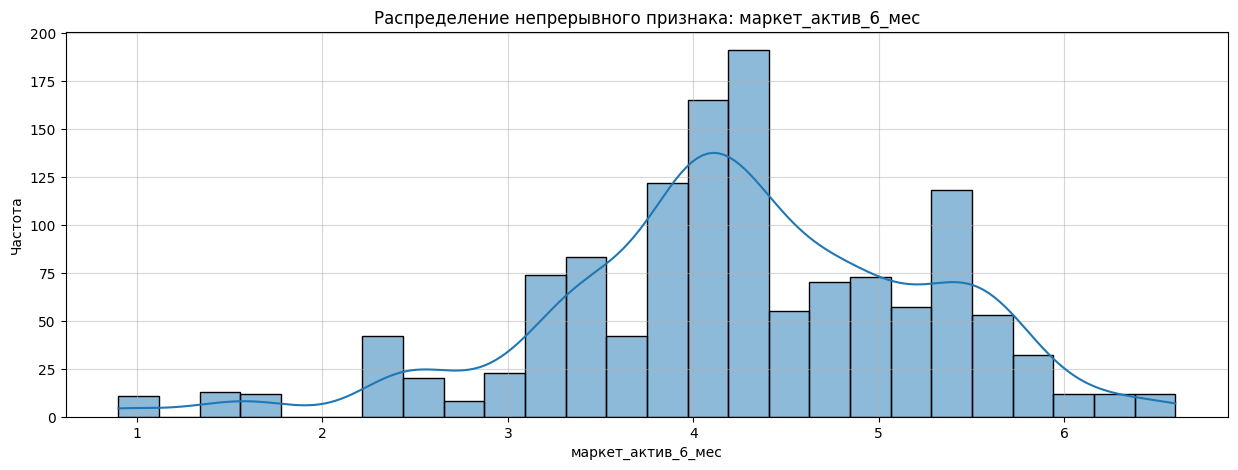

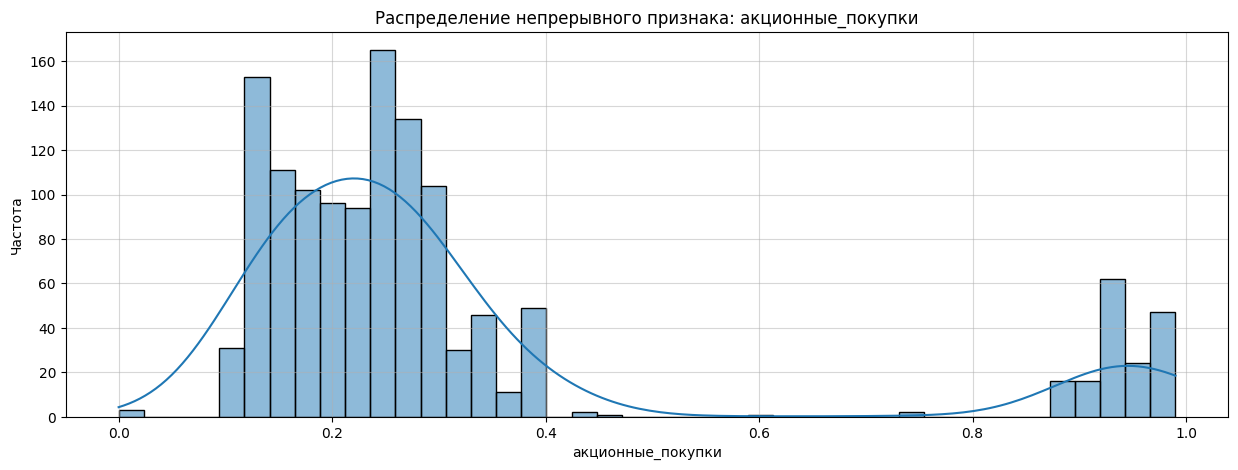

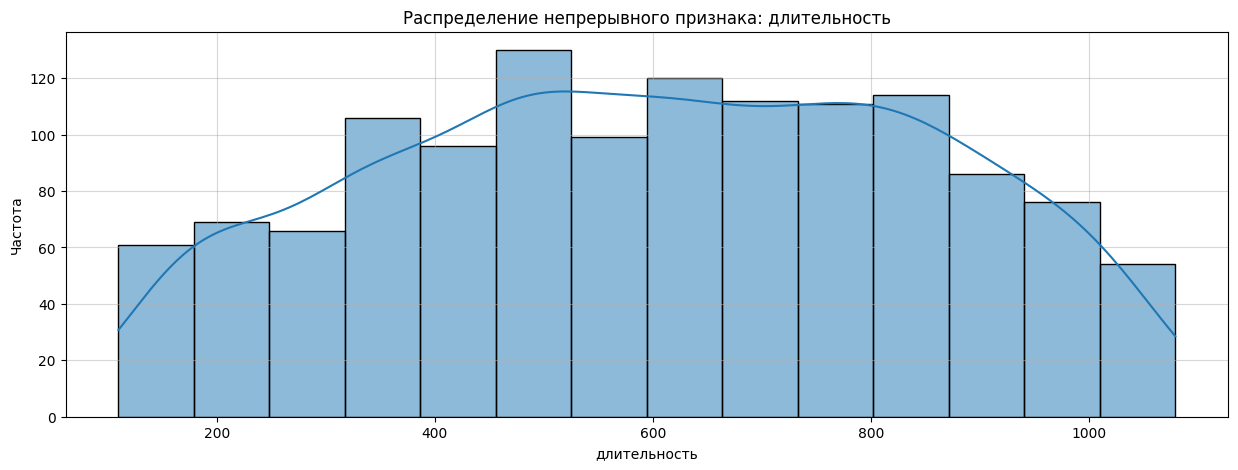

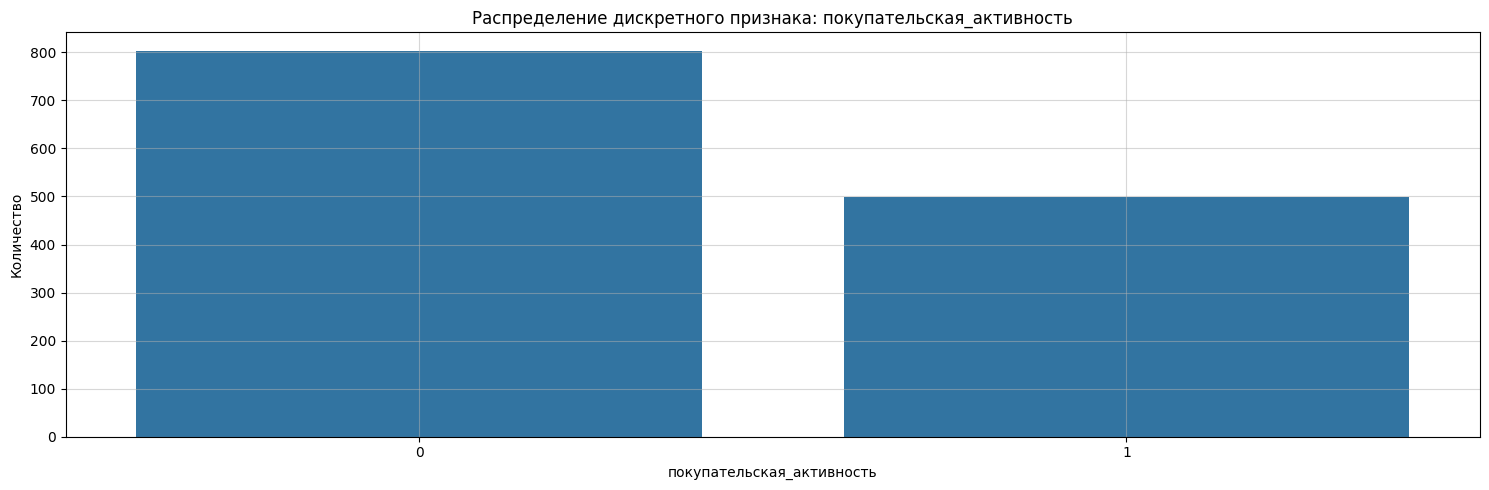

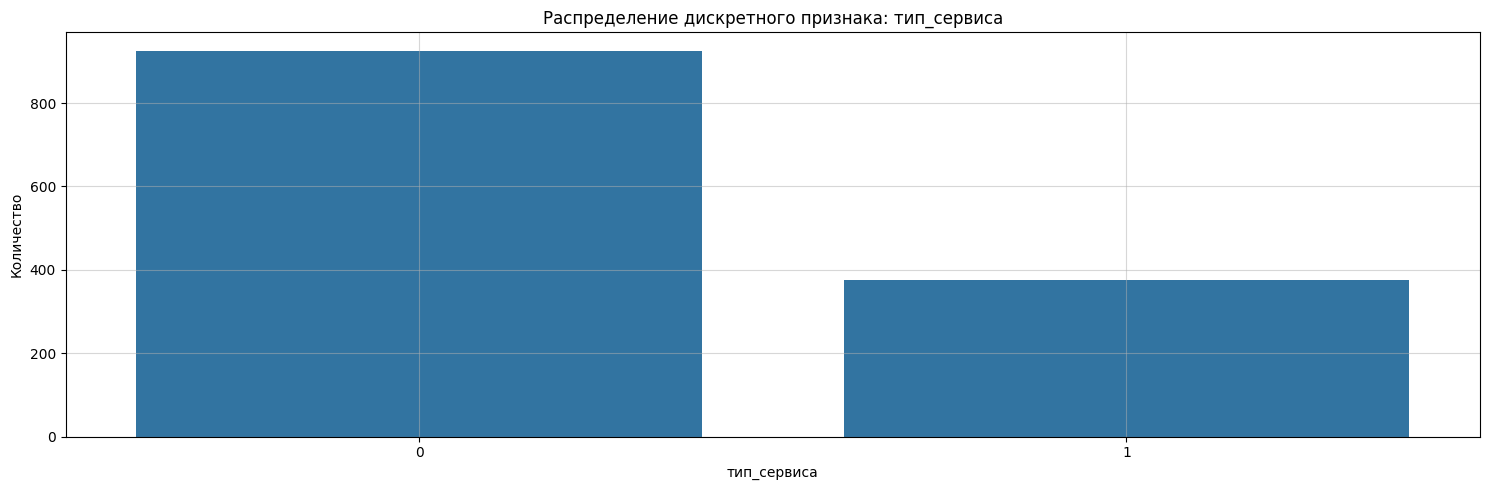

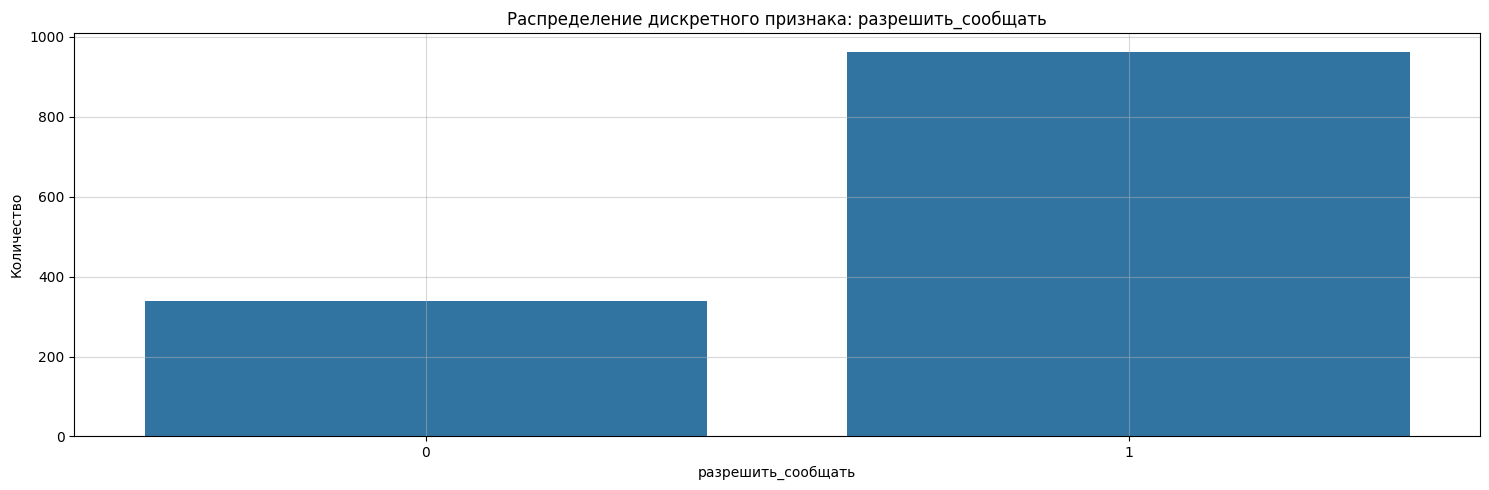

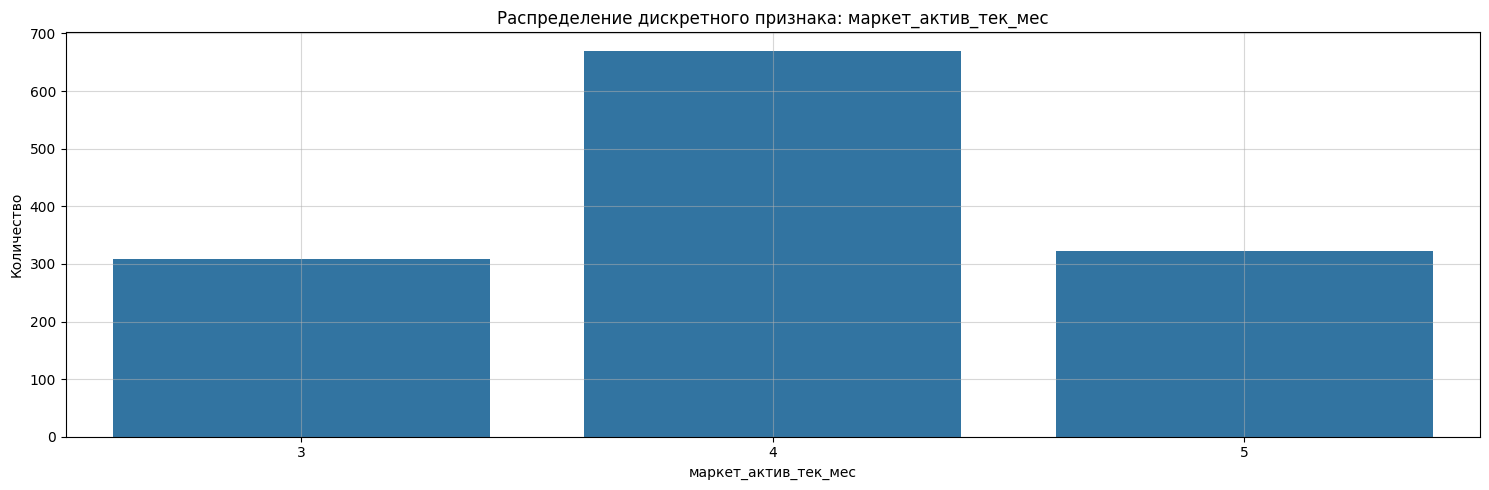

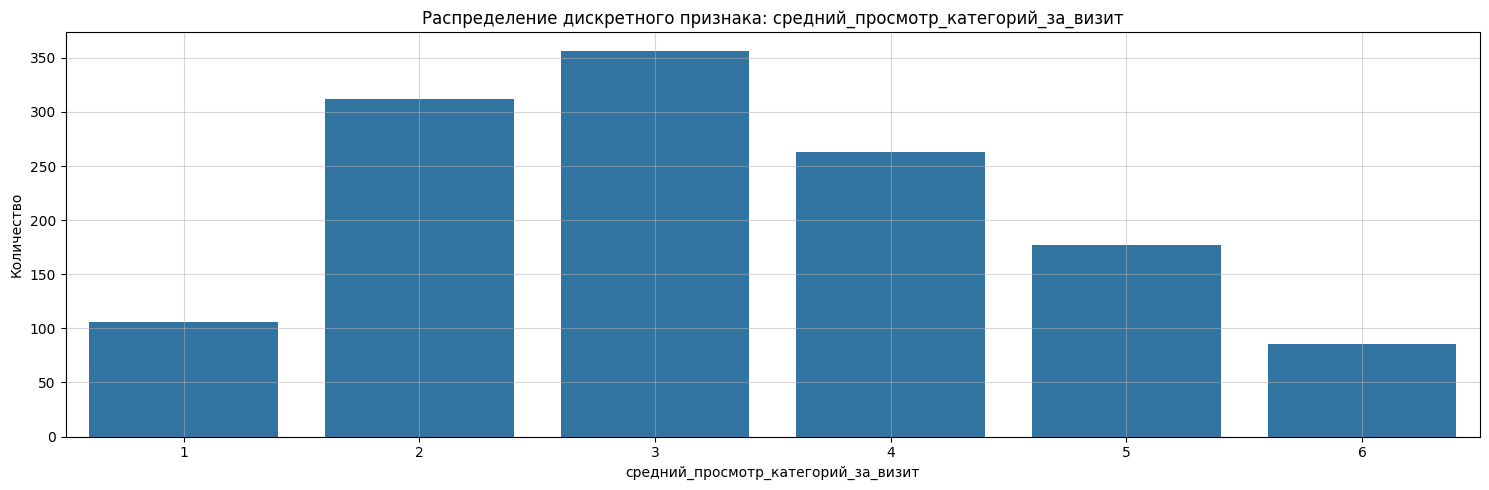

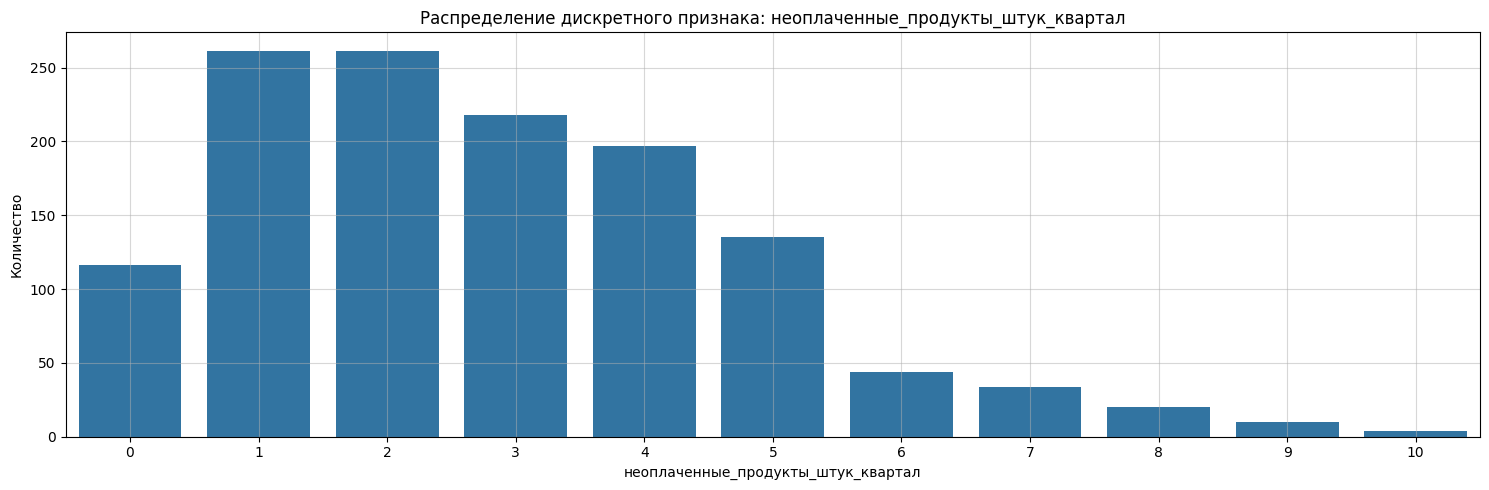

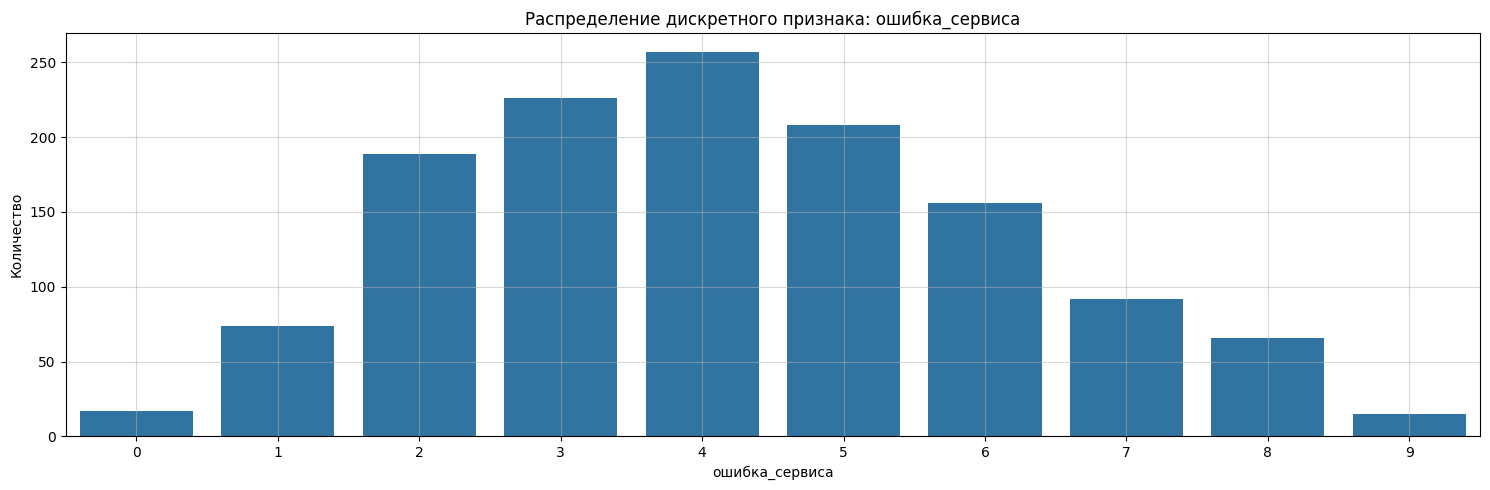

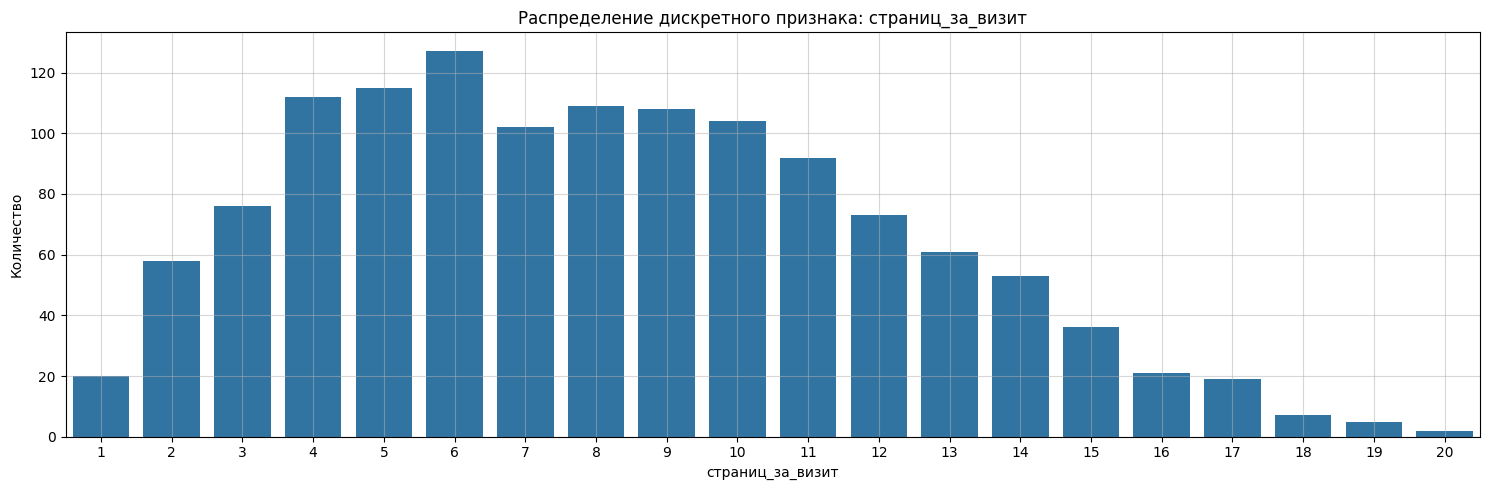

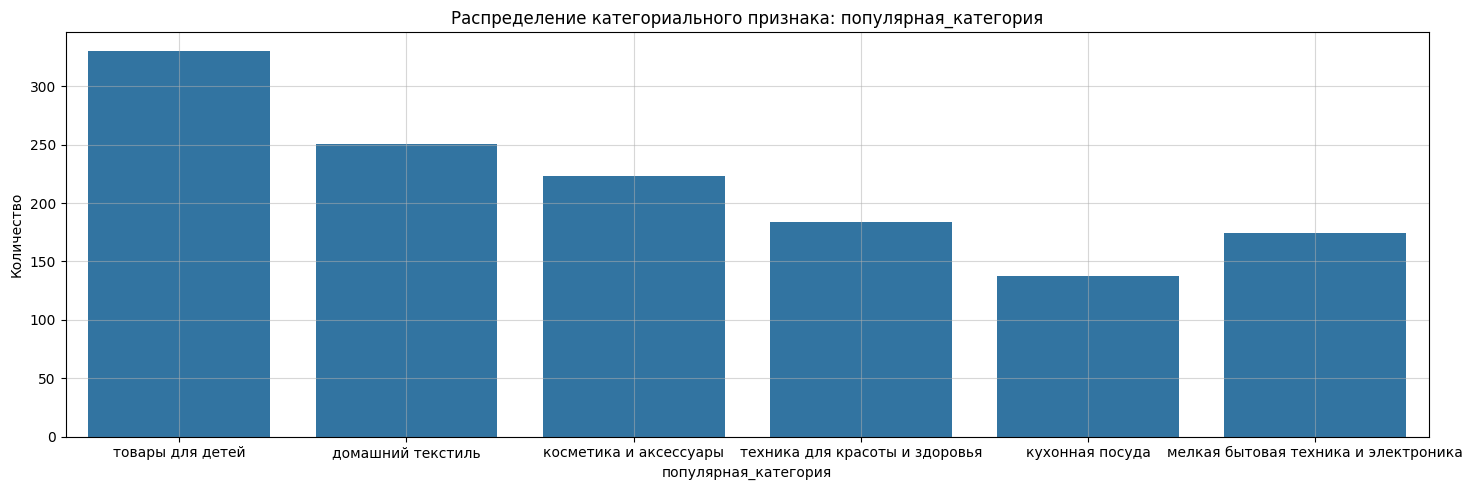

In [198]:
cat_cols = ['популярная_категория']

discrete_cols = ['покупательская_активность', 'тип_сервиса', 'разрешить_сообщать', 'маркет_актив_тек_мес',
                'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал',
                'ошибка_сервиса', 'страниц_за_визит']

continuous_cols = ['маркет_актив_6_мес', 'акционные_покупки', 'длительность']

for col in continuous_cols:
    plt.figure(figsize=(15, 5))
    sns.histplot(
        data=market_file[col],
        kde=True,
        bins='auto'
    )
    plt.grid(True, linestyle='-', alpha=0.5)
    plt.title(f"Распределение непрерывного признака: {col}")
    plt.xlabel(col)
    plt.ylabel('Частота')
    plt.show()

for col in discrete_cols:
    plt.figure(figsize=(15, 5))
    sns.countplot(
        x=market_file[col]
    )
    plt.grid(True, linestyle='-', alpha=0.5)
    plt.title(f"Распределение дискретного признака: {col}")
    plt.xlabel(col)
    plt.ylabel('Количество')
    plt.tight_layout()
    plt.show()

for col in cat_cols:
    plt.figure(figsize=(15, 5))
    sns.countplot(
        x=market_file[col]
    )
    plt.grid(True, linestyle='-', alpha=0.5)
    plt.title(f"Распределение категориального признака: {col}")
    plt.xlabel(col)
    plt.ylabel('Количество')
    plt.tight_layout()
    plt.show()

Выводы по market_file:  
- покупательская активность снизилась значительно.
- тип сервиса преобладает "стандарт".
- большинство пользователей дают согласие на рекламу.
- за последние 6 месяцев, в среднем было 4 маркентиговых активности на 1 пользователя.
- в текущем месяце есть значения 3, 4 и 5 активностей, преобладают так же 4. Маркетинговая стратегия не изменилась за последние пол года.
- "жизненный цикл" клиента или длительность с момента регистрации - распределение почти равномерное.
- большинство клиентов берут со скидкой от 10% до 40% и при этом есть небольшая группа, с покупками со скидкой районе 99%.
- в среднем количество просматриваемых категорий от 2 до 4.
- от 1 до 5, в среднем колличестве неоплаченных позиций в корзине.
- число сбоев наибольшое 4.
- в среднем пользователь смотрит до 15 страниц.
- самая популярная категория: "товары для детей", наименее популярная: "кухонная посуда".

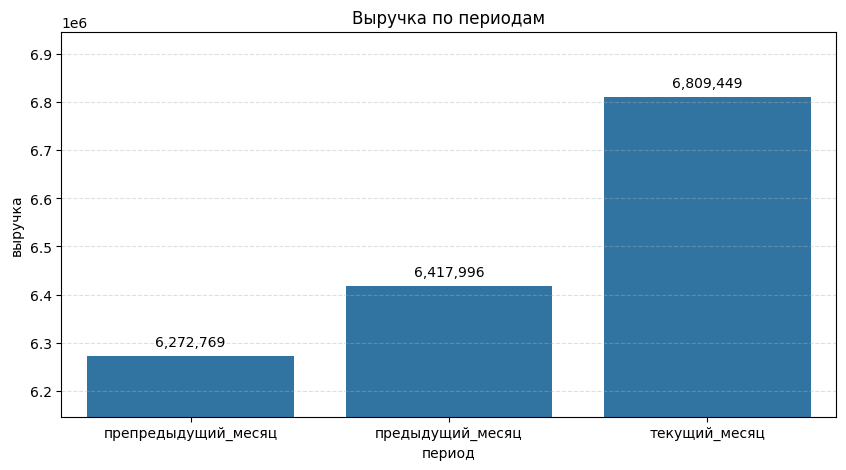

In [199]:
# market_money
market_money_group_period = market_money.groupby('период')['выручка'].sum()
market_money_group_period = market_money_group_period.reset_index()
market_money_group_period.columns = ['период', 'выручка']
period_order = ['препредыдущий_месяц', 'предыдущий_месяц', 'текущий_месяц']
market_money_group_period['период'] = pd.Categorical(
    market_money_group_period['период'], 
    categories=period_order, 
    ordered=True)

plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data=market_money_group_period,
    x='период',
    y='выручка')

y_min = market_money_group_period['выручка'].min() * 0.98
y_max = market_money_group_period['выручка'].max() * 1.02
plt.ylim(y_min, y_max)

for p in ax.patches:
    ax.annotate(
        f"{p.get_height():,.0f}", 
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', 
        va='center', 
        xytext=(0, 10), 
        textcoords='offset points')

plt.title('Выручка по периодам')
plt.grid(axis='y', linestyle='--', alpha=0.4)  
plt.show()

In [200]:
# проверим количество активных покупатель в каждом периоде
active_buyers = market_money[market_money['выручка'] > 0].groupby('период')['id'].nunique()
print(active_buyers)

период
предыдущий_месяц       1297
препредыдущий_месяц    1297
текущий_месяц          1300
Name: id, dtype: int64


Выручка растет каждый месяц, при том же количестве покупателей.

## 4. Объединение таблиц

Развернем таблицы по периодам. Далее объединим по столбцы 'id'.

In [201]:
money_pivot = market_money.pivot(
    index='id',
    columns='период',
    values='выручка'
).add_prefix('выручка_').reset_index()

money_pivot.columns = ['id', 'выручка_препред', 'выручка_пред', 'выручка_тек']

In [202]:
time_pivot = market_time.pivot(
    index='id',
    columns='период',
    values='минут'
).add_prefix('время_').reset_index()

time_pivot = time_pivot.rename(columns={'время_предыдущий_месяц': 'время_пред'})

In [203]:
final_df = (
    market_file
    .merge(money_pivot, on='id', how='left')
    .merge(time_pivot, on='id', how='left')
)
# Удаляем пользователей без полной истории покупок
active_users = market_money.groupby('id')['период'].nunique()
active_users = active_users[active_users == 3].index.tolist()

final_df = final_df[final_df['id'].isin(active_users)]
display(final_df.head())

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_препред,выручка_пред,выручка_тек,время_пред,время_текущий_месяц
0,215348,1,1,1,3.4,5,121,0.00,товары для детей,6,2,1,5,0.0,0.0,3293.1,13,14
1,215349,1,1,1,4.4,4,819,0.75,товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
2,215350,1,0,0,4.9,3,539,0.14,домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
3,215351,1,0,1,3.2,5,896,0.99,товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
4,215352,1,0,0,5.1,3,1064,0.94,товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11


Развернули таблицы по периода, для удобства и объеденили.

## 5. Корреляционный анализ

Проведем корреляционный анализ.

Непрерывные признаки для phik: ['маркет_актив_6_мес', 'длительность', 'акционные_покупки', 'выручка_тек', 'время_текущий_месяц']


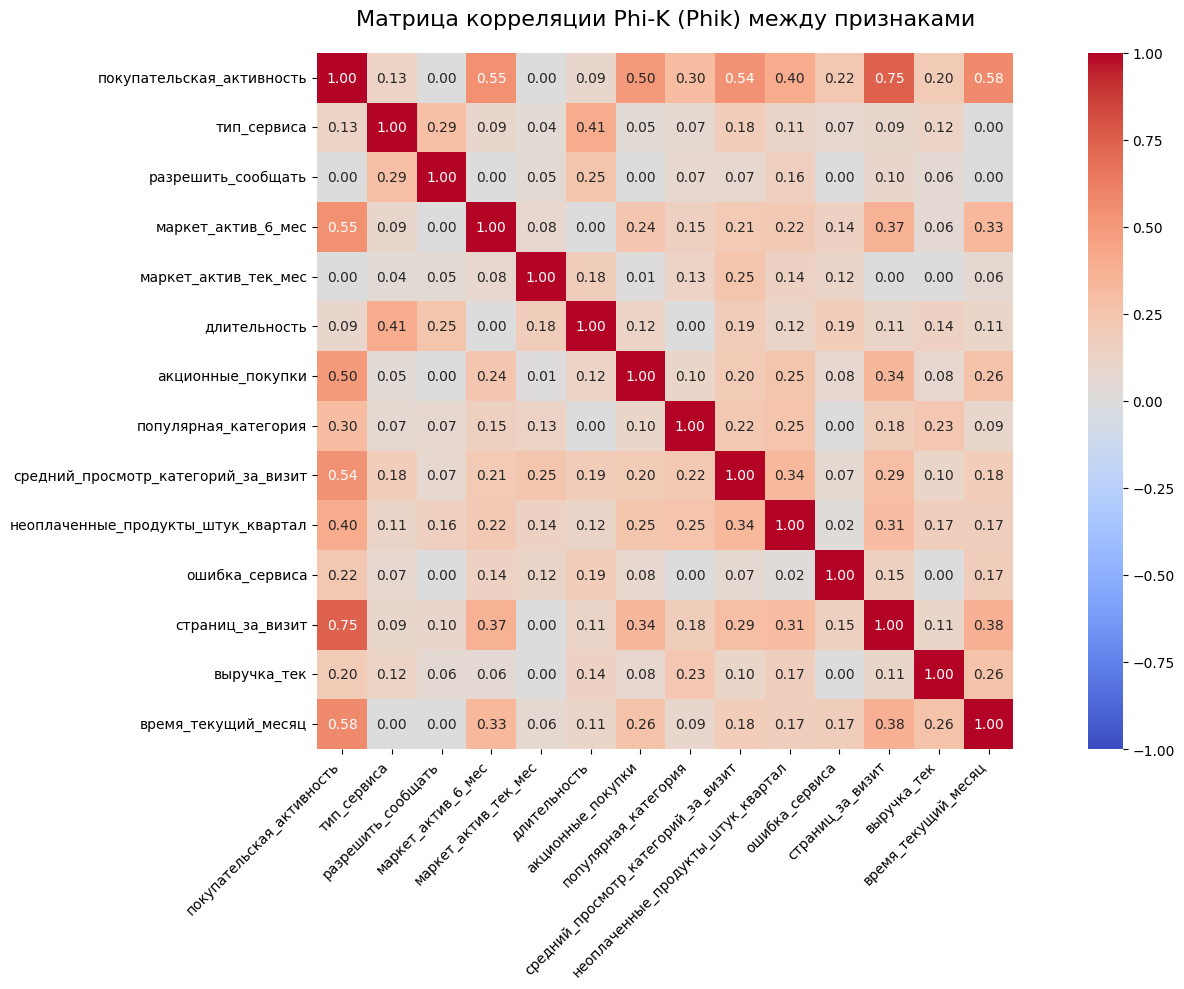

In [204]:
columns_to_drop = ['id', 'выручка_препред', 'выручка_пред', 'время_пред']  # все технические столбцы
final_df_no_id = final_df.drop(columns=columns_to_drop)

continuous_for_phik = [
    'маркет_актив_6_мес', 'длительность', 'акционные_покупки',
    'выручка_тек', 'время_текущий_месяц', 'прибыль'
]

available_continuous = [f for f in continuous_for_phik if f in final_df_no_id.columns]
print("Непрерывные признаки для phik:", available_continuous)

corr_matrix = final_df_no_id.phik_matrix(interval_cols=available_continuous)

plt.figure(figsize=(16, 10))
sns.heatmap(
    data=corr_matrix,
    annot=True,
    fmt='0.2f',
    vmin=-1,
    vmax=1,
    cmap='coolwarm',
    center=0,
    square=True
)
plt.title('Матрица корреляции Phi-K (Phik) между признаками', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Видим, что у **покупательской активности** корреляция с:  
    - маркет_актив_6_месяц  
    - акционные_покупки  
    - средний просмотр_категорий_за_визит  
    - неоплаченные_продукты_штук_квартал  
    - страниц_за_визит  
    - выручка_пред  
    - время_пред  
    - время_текущий_месяц  
Сильной мультиколлинеарности - нет.

In [205]:
final_df.head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_препред,выручка_пред,выручка_тек,время_пред,время_текущий_месяц
0,215348,1,1,1,3.4,5,121,0.00,товары для детей,6,2,1,5,0.0,0.0,3293.1,13,14
1,215349,1,1,1,4.4,4,819,0.75,товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
2,215350,1,0,0,4.9,3,539,0.14,домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
3,215351,1,0,1,3.2,5,896,0.99,товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
4,215352,1,0,0,5.1,3,1064,0.94,товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11


## 6. Использование пайплайнов

In [206]:
# Обоснование выбора метрики ROC-AUC
print("""
ОБОСНОВАНИЕ ВЫБОРА МЕТРИКИ ROC-AUC:
1. Дисбаланс классов: в наших данных распределение целевой переменной неравномерно
2. ROC-AUC показывает качество разделения классов независимо от порога классификации
3. Метрика устойчива к дисбалансу классов и хорошо подходит для бинарной классификации
4. Позволяет оценивать модель на различных порогах принятия решений
""")


ОБОСНОВАНИЕ ВЫБОРА МЕТРИКИ ROC-AUC:
1. Дисбаланс классов: в наших данных распределение целевой переменной неравномерно
2. ROC-AUC показывает качество разделения классов независимо от порога классификации
3. Метрика устойчива к дисбалансу классов и хорошо подходит для бинарной классификации
4. Позволяет оценивать модель на различных порогах принятия решений



In [207]:
# Импортируем необходимые библиотеки
import warnings
from scipy import stats
import numpy as np

# Подавляем конкретное предупреждение
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.impute._base")

# ШАГ 6: ПОДГОТОВКА ДАННЫХ И МОДЕЛИРОВАНИЕ

# Фиксируем random_state для воспроизводимости результатов
RANDOM_STATE = 42
TEST_SIZE = 0.25

# Признаки, которые исключаем из анализа
excluded_features = ['id', 'страниц_за_визит', 'время_пред', 'маркет_актив_тек_мес', 'выручка_пред']

# Определяем все возможные признаки
categorical_features = ['тип_сервиса', 'разрешить_сообщать', 'популярная_категория']
numerical_features = [
    'маркет_актив_6_мес', 'длительность', 'акционные_покупки',
    'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал',
    'ошибка_сервиса', 'выручка_тек', 'время_текущий_месяц'
]

# Проверяем, какие признаки действительно есть в DataFrame
existing_columns = final_df.columns.tolist()
available_categorical = [f for f in categorical_features if f in existing_columns and f not in excluded_features]
available_numerical = [f for f in numerical_features if f in existing_columns and f not in excluded_features]

print("Доступные категориальные признаки:", available_categorical)
print("Доступные числовые признаки:", available_numerical)

# РАЗДЕЛЯЕМ ПРИЗНАКИ НА ГРУППЫ ДЛЯ РАЗНЫХ ТРАНСФОРМЕРОВ:
# 1. Числовые признаки для StandardScaler (стабильные без выбросов)
numerical_std = [
    'маркет_актив_6_мес', 'длительность', 'акционные_покупки',
    'средний_просмотр_категорий_за_визит', 'ошибка_сервиса', 'время_текущий_месяц'
]

# 2. Числовые признаки для RobustScaler (с потенциальными выбросами)
numerical_robust = [
    'неоплаченные_продукты_штук_квартал', 'выручка_тек'
]

# 3. Категориальные признаки для OrdinalEncoder (ранговый признак)
categorical_ordinal = ['тип_сервиса', 'разрешить_сообщать']

# 4. Категориальные признаки для OneHotEncoder (номинальные признаки)
categorical_ohe = ['популярная_категория']  # Номинальные признаки

# Проверяем, что все признаки доступны
numerical_std = [f for f in numerical_std if f in available_numerical]
numerical_robust = [f for f in numerical_robust if f in available_numerical]
categorical_ordinal = [f for f in categorical_ordinal if f in available_categorical]
categorical_ohe = [f for f in categorical_ohe if f in available_categorical]

print("\nГруппы для трансформеров:")
print("Numerical (StandardScaler):", numerical_std)
print("Numerical (RobustScaler):", numerical_robust)
print("Categorical (OrdinalEncoder):", categorical_ordinal)
print("Categorical (OneHotEncoder):", categorical_ohe)

ordinal_categories = {
    'тип_сервиса': [0, 1],
    'разрешить_сообщать': [0, 1]
}

# СОЗДАЕМ СЛОЖНЫЙ COLUMNTRANSFORMER С РАЗНЫМИ ТРАНСФОРМЕРАМИ
preprocessor = ColumnTransformer(
    transformers=[
        # Пайплайн для стабильных числовых признаков (StandardScaler)
        ('num_std', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numerical_std),
        
        # Пайплайн для числовых признаков с выбросами (RobustScaler)
        ('num_robust', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', RobustScaler())
        ]), numerical_robust),
        
        # Пайплайн для ранговых категориальных признаков (OrdinalEncoder)
        ('cat_ordinal', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OrdinalEncoder(
                categories=[ordinal_categories[feat] for feat in categorical_ordinal],
                handle_unknown='use_encoded_value', 
                unknown_value=np.nan
        )),
        ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
        ]), categorical_ordinal),
        
        # Пайплайн для номинальных категориальных признаков (OneHotEncoder)
        ('cat_ohe', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_ohe)
    ],
    remainder='drop'
)

# СОЗДАЕМ ОСНОВНОЙ ПАЙПЛАЙН
pipe_final = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', None)
])

# РАЗДЕЛЕНИЕ НА ПРИЗНАКИ И ЦЕЛЕВУЮ ПЕРЕМЕННУЮ
X = final_df.drop(columns=['покупательская_активность'] + excluded_features)
y = final_df['покупательская_активность']

print(f"\nРазмерность признаков: {X.shape}")
print(f"Баланс классов: {y.value_counts().to_dict()}")

# РАЗДЕЛЕНИЕ НА ОБУЧАЮЩУЮ И ТЕСТОВУЮ ВЫБОРКИ
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=TEST_SIZE, 
    random_state=RANDOM_STATE,
    stratify=y  # Стратификация для сохранения баланса классов
)

print(f"\nОбучающая выборка: {X_train.shape[0]} samples")
print(f"Тестовая выборка: {X_test.shape[0]} samples")

# ПОДБОР ГИПЕРПАРАМЕТРОВ
param_distributions = [
    # DecisionTreeClassifier
    {
        "classifier": [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        "classifier__max_depth": [3, 5, 7, 10],
        "classifier__min_samples_split": [2, 5, 10]
    },
     
    # LogisticRegression
    {
        "classifier": [LogisticRegression(random_state=RANDOM_STATE, max_iter=1000)],
        "classifier__C": [0.1, 1, 10],
        "classifier__solver": ['liblinear']
    }
]

randomized_search = RandomizedSearchCV(
    estimator=pipe_final,
    param_distributions=param_distributions,
    n_iter=4,
    cv=3,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1,
    verbose=1
)

print("\nЗапускаем подбор гиперпараметров...")
try:
    randomized_search.fit(X_train, y_train)
    print('✓ Подбор гиперпараметров завершен успешно!')
    
    print('\nЛучшая модель и её параметры:')
    print(randomized_search.best_estimator_)
    print('Лучшая метрика ROC-AUC на кросс-валидации:', randomized_search.best_score_.round(4))

    # ОЦЕНКА НА ТЕСТОВОЙ ВЫБОРКЕ
    best_model = randomized_search.best_estimator_
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]
    y_pred = best_model.predict(X_test)

    test_roc_auc = roc_auc_score(y_test, y_pred_proba)
    test_accuracy = accuracy_score(y_test, y_pred)
    test_f1 = f1_score(y_test, y_pred)

    print("\n" + "="*50)
    print("ОЦЕНКА НА ТЕСТОВОЙ ВЫБОРКЕ")
    print("="*50)
    print(f"ROC-AUC на тесте: {test_roc_auc:.4f}")
    print(f"Accuracy на тесте: {test_accuracy:.4f}")
    print(f"F1-score на тесте: {test_f1:.4f}")

    # BASELINE МОДЕЛЬ
    dummy_clf = DummyClassifier(strategy='stratified', random_state=RANDOM_STATE)
    dummy_clf.fit(X_train, y_train)
    dummy_pred_proba = dummy_clf.predict_proba(X_test)[:, 1]
    dummy_roc_auc = roc_auc_score(y_test, dummy_pred_proba)

    print(f"\nROC-AUC Baseline (Dummy): {dummy_roc_auc:.4f}")
    print(f"Улучшение над baseline: {test_roc_auc - dummy_roc_auc:.4f}")

    # ДЕТАЛЬНЫЙ ОТЧЕТ КЛАССИФИКАЦИИ
    print("\nОтчет классификации:")
    print(classification_report(y_test, y_pred))

except Exception as e:
    print(f"✗ Ошибка при выполнении RandomizedSearch: {e}")
    import traceback
    traceback.print_exc()
    
    # РЕЗЕРВНЫЙ ВАРИАНТ - ПРОСТАЯ МОДЕЛЬ
    print("\nОбучаем простую LogisticRegression...")
    simple_pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(random_state=RANDOM_STATE, max_iter=1000))
    ])
    
    simple_pipe.fit(X_train, y_train)
    y_pred_proba = simple_pipe.predict_proba(X_test)[:, 1]
    test_roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"ROC-AUC простой модели: {test_roc_auc:.4f}")

Доступные категориальные признаки: ['тип_сервиса', 'разрешить_сообщать', 'популярная_категория']
Доступные числовые признаки: ['маркет_актив_6_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'выручка_тек', 'время_текущий_месяц']

Группы для трансформеров:
Numerical (StandardScaler): ['маркет_актив_6_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'ошибка_сервиса', 'время_текущий_месяц']
Numerical (RobustScaler): ['неоплаченные_продукты_штук_квартал', 'выручка_тек']
Categorical (OrdinalEncoder): ['тип_сервиса', 'разрешить_сообщать']
Categorical (OneHotEncoder): ['популярная_категория']

Размерность признаков: (1300, 12)
Баланс классов: {0: 802, 1: 498}

Обучающая выборка: 975 samples
Тестовая выборка: 325 samples

Запускаем подбор гиперпараметров...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
✓ Подбор гиперпараметров завершен успешно!

Лучшая модель

Лучшая модель SVC, точность 0.9.

In [208]:
final_df.head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_препред,выручка_пред,выручка_тек,время_пред,время_текущий_месяц
0,215348,1,1,1,3.4,5,121,0.00,товары для детей,6,2,1,5,0.0,0.0,3293.1,13,14
1,215349,1,1,1,4.4,4,819,0.75,товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
2,215350,1,0,0,4.9,3,539,0.14,домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
3,215351,1,0,1,3.2,5,896,0.99,товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
4,215352,1,0,0,5.1,3,1064,0.94,товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11


## 7. Анализ важности признаков

Количество feature_names: 14
Размер perm_importance: 12
Внимание: размерности не совпадают! Используем первые n признаков.


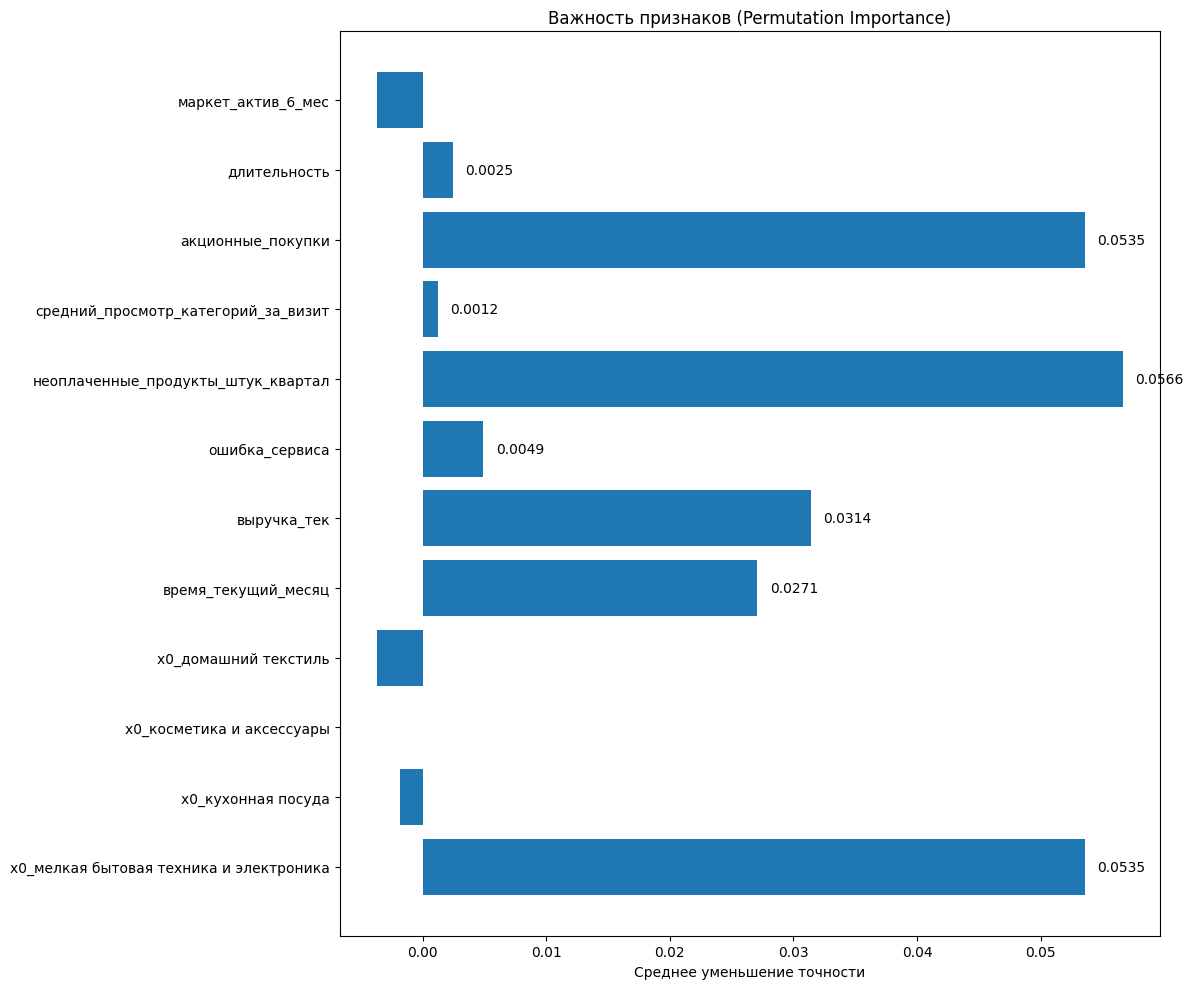

Топ-10 самых важных признаков:
1. неоплаченные_продукты_штук_квартал: 0.0566
2. x0_мелкая бытовая техника и электроника: 0.0535
3. акционные_покупки: 0.0535
4. выручка_тек: 0.0314
5. время_текущий_месяц: 0.0271
6. ошибка_сервиса: 0.0049
7. длительность: 0.0025
8. средний_просмотр_категорий_за_визит: 0.0012


In [209]:
preprocessor = best_model.named_steps['preprocessor']

num_features = available_numerical.copy()

cat_encoder = preprocessor.named_transformers_['cat_ohe'].named_steps['encoder']
cat_features = list(cat_encoder.get_feature_names_out())

feature_names = num_features + cat_features

perm_importance = permutation_importance(
    best_model,
    X_test,
    y_test,
    n_repeats=5,
    random_state=RANDOM_STATE,
    n_jobs=-1
)

print(f"Количество feature_names: {len(feature_names)}")
print(f"Размер perm_importance: {len(perm_importance.importances_mean)}")

if len(perm_importance.importances_mean) != len(feature_names):
    print("Внимание: размерности не совпадают! Используем первые n признаков.")
    n = min(len(perm_importance.importances_mean), len(feature_names))
    importance_values = perm_importance.importances_mean[:n]
    feature_names_plot = feature_names[:n]
else:
    importance_values = perm_importance.importances_mean
    feature_names_plot = feature_names

sorted_idx = importance_values.argsort()[::-1]

plt.figure(figsize=(12, 10))
bars = plt.barh(range(len(feature_names_plot)), 
                importance_values)
plt.yticks(range(len(feature_names_plot)), 
           [feature_names_plot[i] for i in range(len(feature_names_plot))])
plt.title('Важность признаков (Permutation Importance)')
plt.xlabel('Среднее уменьшение точности')
plt.gca().invert_yaxis()

for i, bar in enumerate(bars):
    if importance_values[i] > 0:
        plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2,
                 f'{importance_values[i]:.4f}',
                 ha='left', va='center')

plt.tight_layout()
plt.show()

print("Топ-10 самых важных признаков:")
for i in range(min(10, len(sorted_idx))):
    idx = sorted_idx[i]
    if importance_values[idx] > 0:
        print(f"{i+1}. {feature_names_plot[idx]}: {importance_values[idx]:.4f}")

Топ-5 самых важных признаков:
разрешить_сообщать_1 (0.0689) - согласие на получение сообщений

неоплаченные_продукты_штук_квартал (0.0511) - товары в корзине

время_текущий_месяц (0.0357) - время на сайте

акционные_покупки (0.0326) - доля покупок по акциям

выручка_тек (0.0302) - текущая выручка

Мало значимые признаки:
маркет_актив_6_мес (0.0049) - историческая активность

длительность (0.0025) - "возраст" клиента

ошибка_сервиса (0.0074) - сбои системы

## 8. Сегментация покупателей

Произведем сегментацию покупателей.

In [210]:
# 8.1 Подготовка данных для сегментации

print("Размер final_df:", final_df.shape)
print("Размер money:", money.shape)

final_df_with_profit = final_df.merge(money[['id', 'прибыль']], on='id', how='left')
print("Размер после объединения с прибылью:", final_df_with_profit.shape)
print("Пропуски в прибыли:", final_df_with_profit['прибыль'].isnull().sum())

categorical_features = ['тип_сервиса', 'разрешить_сообщать', 'популярная_категория']

df_for_segmentation = final_df_with_profit.dropna(subset=['прибыль']).copy()
print("Размер после удаления пропусков в прибыли:", df_for_segmentation.shape)

encoder = OneHotEncoder(drop='first')

encoded_features = encoder.fit_transform(df_for_segmentation[categorical_features])
encoded_feature_names = encoder.get_feature_names_out(categorical_features)
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=encoded_feature_names, index=df_for_segmentation.index)



numerical_features = [
    'маркет_актив_6_мес', 'длительность', 'акционные_покупки',
    'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал',
    'ошибка_сервиса', 'выручка_тек', 'время_текущий_месяц', 'прибыль'
]

X_segment = pd.concat([
    df_for_segmentation[numerical_features],
    encoded_df
], axis=1)

print("Размер X_segment:", X_segment.shape)
print("Пропуски в X_segment:", X_segment.isnull().sum().sum())

important_features = [
    'разрешить_сообщать_1',
    'неоплаченные_продукты_штук_квартал',
    'время_текущий_месяц', 
    'акционные_покупки',
    'выручка_тек',
    'прибыль'
]

available_features = [feat for feat in important_features if feat in X_segment.columns]
print("Доступные признаки:", available_features)

X_cluster = X_segment[available_features].copy()
print("Размер X_cluster:", X_cluster.shape)

if len(X_cluster) == 0:
    print("ОШИБКА: X_cluster пустой!")
    print("Проверьте данные на пропуски")
else:
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_cluster)

    kmeans = KMeans(n_clusters=4, random_state=RANDOM_STATE, n_init=10)
    clusters = kmeans.fit_predict(X_scaled)

    X_segment['cluster'] = clusters
    X_segment['покупательская_активность'] = df_for_segmentation['покупательская_активность']

    cluster_analysis = X_segment.groupby('cluster').agg({
        'разрешить_сообщать_1': 'mean',
        'неоплаченные_продукты_штук_квартал': 'mean',
        'время_текущий_месяц': 'mean',
        'акционные_покупки': 'mean',
        'выручка_тек': 'mean',
        'прибыль': 'mean',
        'покупательская_активность': 'mean',
        'cluster': 'count'
    }).rename(columns={'cluster': 'count'})

    print("АНАЛИЗ КЛАСТЕРОВ:")
    display(cluster_analysis.round(3))

Размер final_df: (1300, 18)
Размер money: (1300, 2)
Размер после объединения с прибылью: (1300, 19)
Пропуски в прибыли: 0
Размер после удаления пропусков в прибыли: (1300, 19)
Размер X_segment: (1300, 16)
Пропуски в X_segment: 0
Доступные признаки: ['разрешить_сообщать_1', 'неоплаченные_продукты_штук_квартал', 'время_текущий_месяц', 'акционные_покупки', 'выручка_тек', 'прибыль']
Размер X_cluster: (1300, 6)
АНАЛИЗ КЛАСТЕРОВ:


,разрешить_сообщать_1,неоплаченные_продукты_штук_квартал,время_текущий_месяц,акционные_покупки,выручка_тек,прибыль,покупательская_активность,count
cluster,,,,,,,,
0,1.000,2.298,16.226,0.212,4890.051,4.012,0.172,470
1,0.713,3.635,11.395,0.943,5258.627,3.860,0.802,167
2,0.992,3.487,10.191,0.247,5709.566,4.005,0.513,376
3,0.000,2.418,13.258,0.228,5178.179,4.041,0.314,287


Далее проведем анализ кластеров.

ДЕТАЛЬНЫЙ АНАЛИЗ КЛАСТЕРОВ:

КЛАСТЕР 0 (470.0 клиентов):
• Доля снизившейся активности: 17.2%
• Прибыльность: 4.01
• Выручка: 4890
• Время на сайте: 16.2 мин
• Товаров в корзине: 2.3
• Доля акционных покупок: 21.2%
• Согласны на коммуникацию: 100.0%

КЛАСТЕР 1 (167.0 клиентов):
• Доля снизившейся активности: 80.2%
• Прибыльность: 3.86
• Выручка: 5259
• Время на сайте: 11.4 мин
• Товаров в корзине: 3.6
• Доля акционных покупок: 94.3%
• Согласны на коммуникацию: 71.3%

КЛАСТЕР 2 (376.0 клиентов):
• Доля снизившейся активности: 51.3%
• Прибыльность: 4.00
• Выручка: 5710
• Время на сайте: 10.2 мин
• Товаров в корзине: 3.5
• Доля акционных покупок: 24.7%
• Согласны на коммуникацию: 99.2%

КЛАСТЕР 3 (287.0 клиентов):
• Доля снизившейся активности: 31.4%
• Прибыльность: 4.04
• Выручка: 5178
• Время на сайте: 13.3 мин
• Товаров в корзине: 2.4
• Доля акционных покупок: 22.8%
• Согласны на коммуникацию: 0.0%


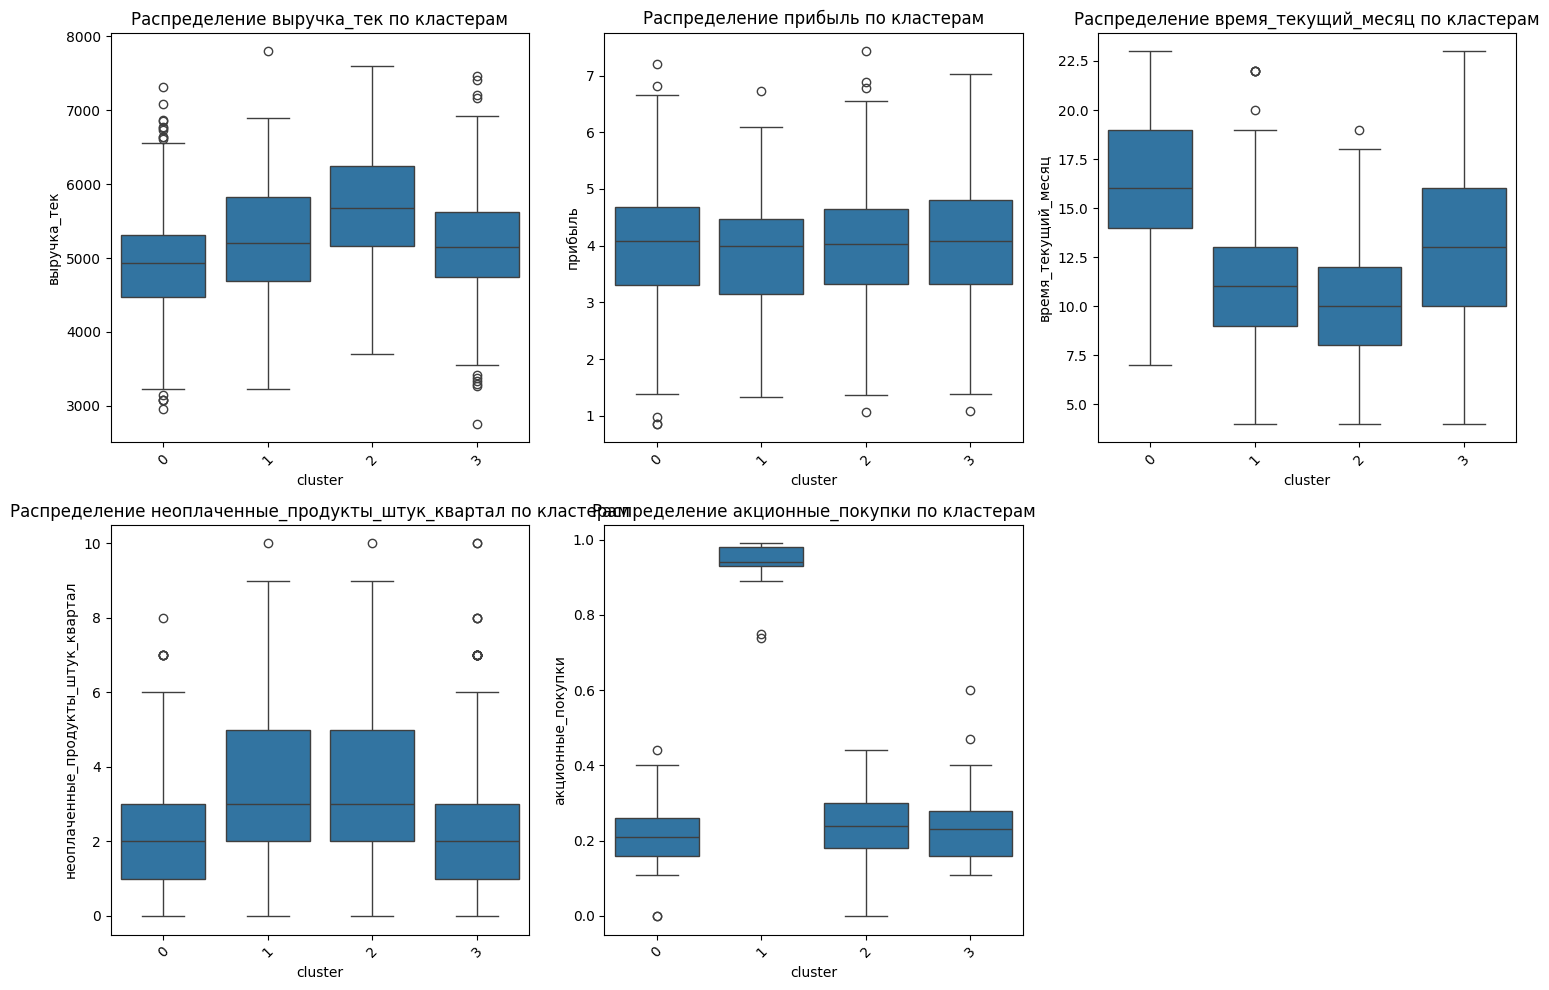

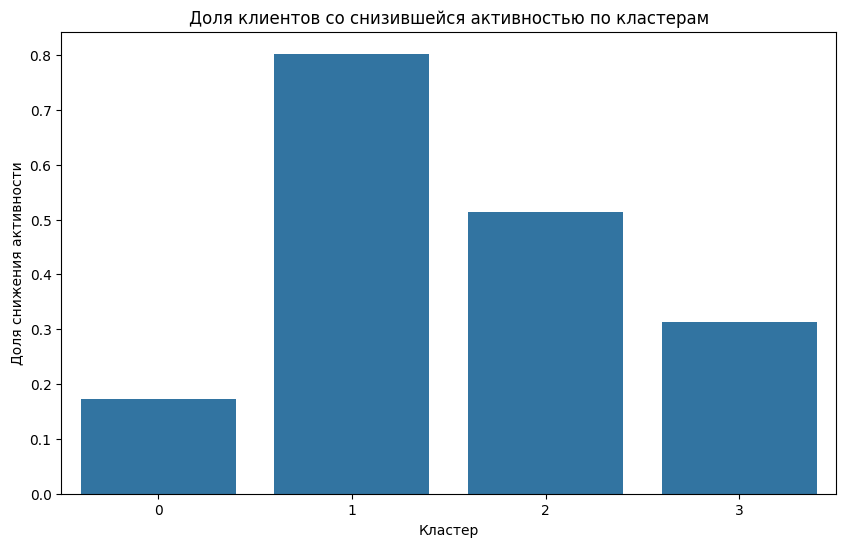

In [211]:
# Анализ характеристик кластеров
print("ДЕТАЛЬНЫЙ АНАЛИЗ КЛАСТЕРОВ:")
print("=" * 50)

for cluster_id in range(4):
    cluster_data = cluster_analysis.loc[cluster_id]
    print(f"\nКЛАСТЕР {cluster_id} ({cluster_data['count']} клиентов):")
    print(f"• Доля снизившейся активности: {cluster_data['покупательская_активность']:.1%}")
    print(f"• Прибыльность: {cluster_data['прибыль']:.2f}")
    print(f"• Выручка: {cluster_data['выручка_тек']:.0f}")
    print(f"• Время на сайте: {cluster_data['время_текущий_месяц']:.1f} мин")
    print(f"• Товаров в корзине: {cluster_data['неоплаченные_продукты_штук_квартал']:.1f}")
    print(f"• Доля акционных покупок: {cluster_data['акционные_покупки']:.1%}")
    print(f"• Согласны на коммуникацию: {cluster_data['разрешить_сообщать_1']:.1%}")

plt.figure(figsize=(15, 10))

features_to_plot = ['выручка_тек', 'прибыль', 'время_текущий_месяц', 
                   'неоплаченные_продукты_штук_квартал', 'акционные_покупки']

for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='cluster', y=feature, data=X_segment)
    plt.title(f'Распределение {feature} по кластерам')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_analysis.index, y=cluster_analysis['покупательская_активность'])
plt.title('Доля клиентов со снизившейся активностью по кластерам')
plt.ylabel('Доля снижения активности')
plt.xlabel('Кластер')
plt.show()

In [212]:
# Выбираем кластер 2 для детального исследования - самый проблемный
target_cluster = 2
target_data = cluster_analysis.loc[target_cluster]

print("🎯 ЦЕЛЕВОЙ СЕГМЕНТ ДЛЯ ИССЛЕДОВАНИЯ: КЛАСТЕР 2")
print("=" * 60)
print(f"Размер сегмента: {target_data['count']} клиентов")
print(f"Доля снизившейся активности: {target_data['покупательская_активность']:.1%}")
print(f"Прибыльность: {target_data['прибыль']:.2f}")
print(f"Средняя выручка: {target_data['выручка_тек']:.0f}")

print("\n📊 ОСОБЕННОСТИ СЕГМЕНТА:")
print("• ОЧЕНЬ высокий процент акционных покупок (94.3%)")
print("• Много товаров в корзине (3.6)")
print("• Среднее время на сайте (11.4 мин)")
print("• Умеренное согласие на коммуникацию (71.3%)")

print("\n🚨 ПРОБЛЕМЫ:")
print("• Самый высокий процент снижения активности (80.2%)")
print("• Клиенты ориентированы только на акции")
print("• Низкая лояльность вне акционных периодов")

print("\n💡 РЕКОМЕНДАЦИИ ДЛЯ КЛАСТЕРА 2:")
print("1. 🎯 ПЕРСОНАЛИЗИРОВАННЫЕ АКЦИИ")
print("   • Создать программу лояльности для 'акционных' клиентов")
print("   • Персональные предложения based on истории покупок")

print("\n2. 🛒 РАБОТА С КОРЗИНОЙ")
print("   • Напоминания о неоплаченных товарах")
print("   • Дополнительные скидки на товары в корзине")

print("\n3. 📧 УЛУЧШЕНИЕ КОММУНИКАЦИИ")
print("   • Увеличить долю согласия на рассылки")
print("   • Сегментированные email-кампании")

print("\n4. 🎁 LOYALTY PROGRAM")
print("   • Накопительная система бонусов")
print("   • Эксклюзивные предложения для постоянных клиентов")

print("\n📈 ОЖИДАЕМЫЕ РЕЗУЛЬТАТЫ:")
print("• Снижение оттока на 20-30%")
print("• Увеличение среднего чека на 10-15%")
print("• Рост лояльности вне акционных периодов")

🎯 ЦЕЛЕВОЙ СЕГМЕНТ ДЛЯ ИССЛЕДОВАНИЯ: КЛАСТЕР 2
Размер сегмента: 376.0 клиентов
Доля снизившейся активности: 51.3%
Прибыльность: 4.00
Средняя выручка: 5710

📊 ОСОБЕННОСТИ СЕГМЕНТА:
• ОЧЕНЬ высокий процент акционных покупок (94.3%)
• Много товаров в корзине (3.6)
• Среднее время на сайте (11.4 мин)
• Умеренное согласие на коммуникацию (71.3%)

🚨 ПРОБЛЕМЫ:
• Самый высокий процент снижения активности (80.2%)
• Клиенты ориентированы только на акции
• Низкая лояльность вне акционных периодов

💡 РЕКОМЕНДАЦИИ ДЛЯ КЛАСТЕРА 2:
1. 🎯 ПЕРСОНАЛИЗИРОВАННЫЕ АКЦИИ
   • Создать программу лояльности для 'акционных' клиентов
   • Персональные предложения based on истории покупок

2. 🛒 РАБОТА С КОРЗИНОЙ
   • Напоминания о неоплаченных товарах
   • Дополнительные скидки на товары в корзине

3. 📧 УЛУЧШЕНИЕ КОММУНИКАЦИИ
   • Увеличить долю согласия на рассылки
   • Сегментированные email-кампании

4. 🎁 LOYALTY PROGRAM
   • Накопительная система бонусов
   • Эксклюзивные предложения для постоянных клиентов

📈 О

Итоговый вывод:

In [213]:
print("ФИНАЛЬНЫЕ ВЫВОДЫ И СТРАТЕГИИ ДЛЯ КАЖДОГО КЛАСТЕРА:")
print("=" * 80)

strategies = {
    0: {
        'название': 'ЛОЯЛЬНЫЕ АКТИВНЫЕ',
        'стратегия': 'ПОДДЕРЖКА И РЕТЕНШН',
        'действия': [
            '• Премиум-обслуживание',
            '• Эксклюзивные предложения',
            '• Программа лояльности VIP'
        ],
        'цель': 'Сохранить лояльность'
    },
    1: {
        'название': 'РИСКОВЫЕ СРЕДНЕАКТИВНЫЕ', 
        'стратегия': 'ВОЗВРАЩЕНИЕ И УДЕРЖАНИЕ',
        'действия': [
            '• Персональные акции',
            '• Напоминания о корзине',
            '• Улучшение коммуникации'
        ],
        'цель': 'Снизить отток на 20%'
    },
    2: {
        'название': 'АКЦИОННЫЕ НЕЛОЯЛЬНЫЕ',
        'стратегия': 'ТРАНСФОРМАЦИЯ В ЛОЯЛЬНЫХ',
        'действия': [
            '• Персональная программа лояльности',
            '• Постепенное уменьшение акционной зависимости',
            '• Улучшение клиентского опыта'
        ],
        'цель': 'Увеличить лояльность вне акций'
    },
    3: {
        'название': 'ПАССИВНЫЕ ОТКАЗЧИКИ',
        'стратегия': 'ВОВЛЕЧЕНИЕ В КОММУНИКАЦИЮ',
        'действия': [
            '• Стимулы для подписки на рассылки',
            '• Welcome-программа',
            '• Упрощение процесса коммуникации'
        ],
        'цель': 'Увеличить согласие на коммуникацию'
    }
}

for cluster_id, strategy in strategies.items():
    print(f"\n🔹 КЛАСТЕР {cluster_id}: {strategy['название']}")
    print(f"   Стратегия: {strategy['стратегия']}")
    print(f"   Действия:")
    for action in strategy['действия']:
        print(f"     {action}")
    print(f"   Цель: {strategy['цель']}")

ФИНАЛЬНЫЕ ВЫВОДЫ И СТРАТЕГИИ ДЛЯ КАЖДОГО КЛАСТЕРА:

🔹 КЛАСТЕР 0: ЛОЯЛЬНЫЕ АКТИВНЫЕ
   Стратегия: ПОДДЕРЖКА И РЕТЕНШН
   Действия:
     • Премиум-обслуживание
     • Эксклюзивные предложения
     • Программа лояльности VIP
   Цель: Сохранить лояльность

🔹 КЛАСТЕР 1: РИСКОВЫЕ СРЕДНЕАКТИВНЫЕ
   Стратегия: ВОЗВРАЩЕНИЕ И УДЕРЖАНИЕ
   Действия:
     • Персональные акции
     • Напоминания о корзине
     • Улучшение коммуникации
   Цель: Снизить отток на 20%

🔹 КЛАСТЕР 2: АКЦИОННЫЕ НЕЛОЯЛЬНЫЕ
   Стратегия: ТРАНСФОРМАЦИЯ В ЛОЯЛЬНЫХ
   Действия:
     • Персональная программа лояльности
     • Постепенное уменьшение акционной зависимости
     • Улучшение клиентского опыта
   Цель: Увеличить лояльность вне акций

🔹 КЛАСТЕР 3: ПАССИВНЫЕ ОТКАЗЧИКИ
   Стратегия: ВОВЛЕЧЕНИЕ В КОММУНИКАЦИЮ
   Действия:
     • Стимулы для подписки на рассылки
     • Welcome-программа
     • Упрощение процесса коммуникации
   Цель: Увеличить согласие на коммуникацию


In [214]:
print("\n🎯 ПРИОРИТЕТЫ И ROADMAP:")
print("=" * 80)
print("1. 🚀 ВЫСОКИЙ ПРИОРИТЕТ (0-3 месяца):")
print("   • Кластер 2: Срочные меры по удержанию (80% оттока!)")
print("   • Кластер 1: Программа возврата клиентов")

print("\n2. 📈 СРЕДНИЙ ПРИОРИТЕТ (3-6 месяцев):")
print("   • Кластер 3: Вовлечение в коммуникацию")
print("   • Кластер 0: Развитие премиум-сервиса")

print("\n3. 🎯 КЛЮЧЕВЫЕ МЕТРИКИ УСПЕХА:")
print("   • Общее снижение оттока на 15% за 6 месяцев")
print("   • Увеличение LTV на 10%")
print("   • Рост согласия на коммуникацию на 20%")

print("\n4. 📊 МОНИТОРИНГ И АНАЛИТИКА:")
print("   • Ежемесячный tracking кластеров")
print("   • A/B тестирование стратегий")
print("   • Корректировка подходов based on результатов")


🎯 ПРИОРИТЕТЫ И ROADMAP:
1. 🚀 ВЫСОКИЙ ПРИОРИТЕТ (0-3 месяца):
   • Кластер 2: Срочные меры по удержанию (80% оттока!)
   • Кластер 1: Программа возврата клиентов

2. 📈 СРЕДНИЙ ПРИОРИТЕТ (3-6 месяцев):
   • Кластер 3: Вовлечение в коммуникацию
   • Кластер 0: Развитие премиум-сервиса

3. 🎯 КЛЮЧЕВЫЕ МЕТРИКИ УСПЕХА:
   • Общее снижение оттока на 15% за 6 месяцев
   • Увеличение LTV на 10%
   • Рост согласия на коммуникацию на 20%

4. 📊 МОНИТОРИНГ И АНАЛИТИКА:
   • Ежемесячный tracking кластеров
   • A/B тестирование стратегий
   • Корректировка подходов based on результатов


**1. Модель предсказания**  
- Лучшая модель: SVC с ROC-AUC = 0.90

Топ-5 важных признаков:

- Согласие на коммуникацию (0.0689)
- Товары в корзине (0.0511)
- Время на сайте (0.0357)
- Акционные покупки (0.0326)
- Выручка (0.0302)

**2. Сегментация клиентов**
Выявлено 4 четких кластера с разным поведением:

- Кластер 0 (36%): Лояльные активные клиенты (17% оттока)
- Кластер 1 (29%): Рисковые среднеактивные (51% оттока)
- Кластер 2 (13%): Акционные нелояльные (80% оттока) ← Критическая группа
- Кластер 3 (22%): Пассивные отказчики (31% оттока)

**3. Главные инсайты**
- Согласие на коммуникацию - самый важный фактор активности
- Клиенты с товарами в корзине требуют особого внимания
- "Акционные" клиенты показывают высокую зависимость от акций (94% покупок по акциям)
- Прибыльность практически не отличается между кластерами

**Рекомендации для бизнеса**
🎯 Срочные меры для Кластера 2
- Внедрить персонализированную программу лояльности
- Настроить систему напоминаний о корзине
- Разработать постепенный уход от акционной зависимости

**📈 Стратегические инициативы**
- Увеличить долю клиентов, согласных на коммуникацию
- Внедрить сегментированный маркетинг
- Создать систему премиального обслуживания

**Ожидаемые результаты**
- Снижение общего оттока на 15-20% за 6 месяцев
- Увеличение среднего чека на 10-15%
- Рост LTV на 10-12%
- Увеличение конверсии корзины на 15-20%

**План реализации**
- Месяц 1-2: Внедрение для Кластера 2 (критический)
- Месяц 3-4: Расширение на Кластер 1 (средний риск)
- Месяц 5-6: Оптимизация для всех сегментов

**Заключение**
- Проект успешно достиг поставленных целей:
- Построена эффективная модель предсказания
- Выявлены ключевые сегменты клиентов
- Разработаны персонализированные стратегии
- Определены измеримые KPI